In [1]:
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns 
from matplotlib import pyplot 
import seaborn 

path = '2018_NFL_ATS_Record_11.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,Team,Record ATS,Total Wins
0,Buffalo Bills,7/9/00,6
1,Miami Dolphins,8/8/00,7
2,New England Patriots,9/7/00,11
3,New York Jets,5/10/01,4
4,Baltimore Ravens,8/8/00,10


In [3]:
df = df.replace('/', '-', regex = True)

In [4]:
new_record_list = []
record_list = df['Record ATS'].tolist()

for x in record_list:
        new_record_list.append(x[:-2] + x[-1])


In [5]:
del df['Record ATS']

df['Record ATS'] = new_record_list

In [6]:
df["Total Wins ATS"]= df["Record ATS"].str.split("-", 1).str[0]

In [7]:
df = df[['Team','Total Wins', 'Total Wins ATS']]

In [8]:
df = df.sort_values(by = ['Total Wins'], ascending = False)
df = df.reset_index().drop(columns=['index'])

In [9]:
df['Total Wins'] = df['Total Wins'].astype('int64')
df['Total Wins ATS']  = df['Total Wins ATS'].astype('int64')
df.head()

,Team,Total Wins,Total Wins ATS
0,Los Angeles Rams,13,7
1,New Orleans Saints,13,10
2,Chicago Bears,12,12
3,Los Angeles Chargers,12,9
4,Kansas City Chiefs,12,9


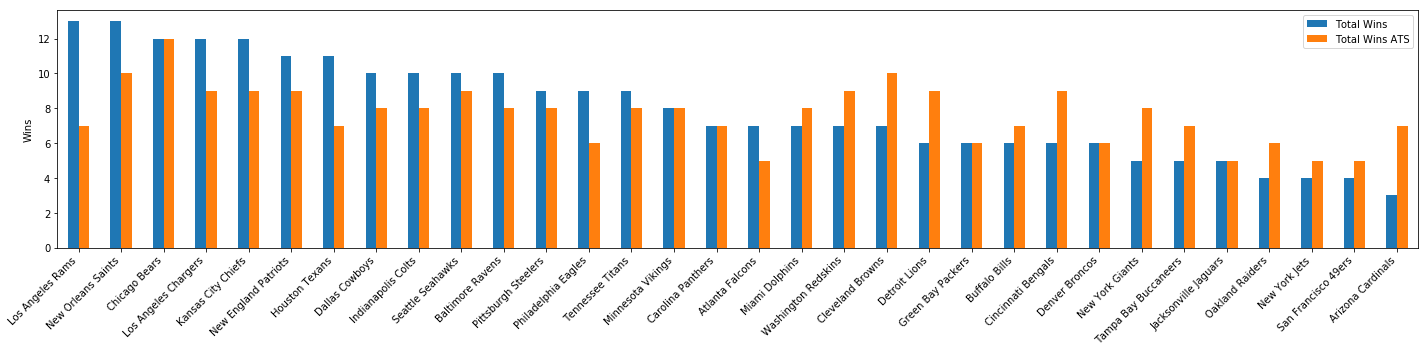

In [10]:
multi_plot = df.plot(kind="bar", figsize=(20,5))

multi_plot.set_xticklabels(df["Team"], rotation=45, ha = "right")



plt.ylabel('Wins')
plt.tight_layout()
plt.savefig('wins_vs_winsATS_barchart.png')

plt.show()

In [11]:
# plt.scatter(df['Total Wins ATS'], df['Total Wins'],marker="o", facecolors="red", edgecolors="black", alpha=0.75)



# plt.ylim(2, 15)

# plt.xlim(2, 15)

# plt.ylabel('Total Wins')
# plt.xlabel('Total Wins ATS')
# plt.tight_layout()
# #plt.savefig('wins_vs_winsATS_scatterhart.png')

# plt.show()

In [12]:
path = 'Team Defense.csv'
df1 = pd.read_csv(path)

In [13]:
rank_df1 = df1[['Rk','Tm']]
rank_df1 = rank_df1[["Tm","Rk"]]

In [14]:
rank_df1 = rank_df1.rename(columns = {'Tm':'Team','Rk':'Rank'})
rank_df1=rank_df1.dropna(how='any')
rank_df1=rank_df1[rank_df1.Team != 'Tm']

In [15]:
new_df  = df.sort_values(by = ['Team']).reset_index().drop(columns = ['index'])
rank_df1 = rank_df1.sort_values(by = ['Team']).reset_index().drop(columns = ['index'])

In [16]:
new_chart = pd.merge(new_df, rank_df1, on='Team', how='inner')
new_chart.head()

,Team,Total Wins,Total Wins ATS,Rank
0,Arizona Cardinals,3,7,26
1,Atlanta Falcons,7,5,25
2,Baltimore Ravens,10,8,2
3,Buffalo Bills,6,7,18
4,Carolina Panthers,7,7,19


In [17]:
new_chart1 = new_chart[['Team','Total Wins ATS', 'Rank']]

In [18]:
new_chart1['Rank'] = new_chart1['Rank'].astype(int)

/Users/eman.llamas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
new_chart1 = new_chart1.sort_values(by = ['Rank'])

In [20]:
new_chart1['Rank'] = new_chart1['Rank'].astype(int)
new_chart1.head()

,Team,Total Wins ATS,Rank
5,Chicago Bears,12,1
2,Baltimore Ravens,8,2
30,Tennessee Titans,8,3
14,Jacksonville Jaguars,5,4
12,Houston Texans,7,5


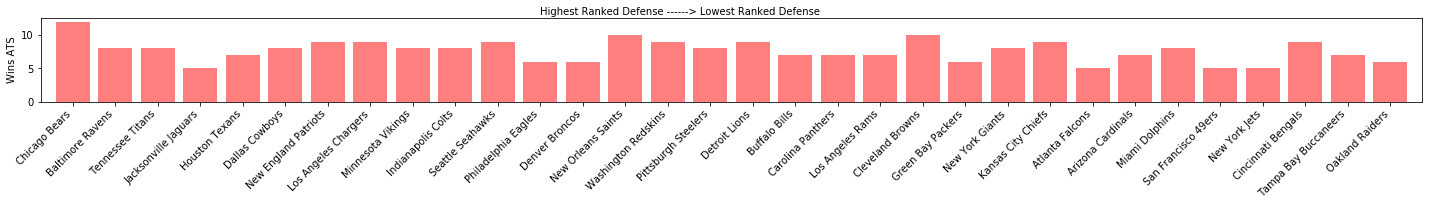

In [21]:
x_axis1 = new_chart1['Team']

plt.figure(figsize=(20,3))

plt.bar(x_axis1, new_chart1['Total Wins ATS'], color='r', alpha=0.5,)
plt.xticks(new_chart1['Team'], rotation = 45, ha = 'right')

plt.xlim(-0.75, len(x_axis1)-0.25)

plt.text(11,13, 'Highest Ranked Defense ------> Lowest Ranked Defense')

plt.ylabel('Wins ATS')
plt.tight_layout()
plt.savefig('Wins ATS_vs_defensiveRank.png')

plt.show()


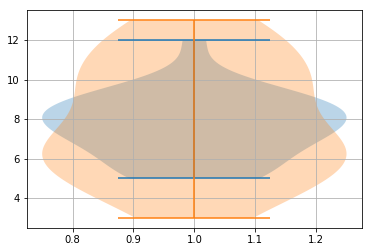

In [22]:
#fig, ax = pyplot.subplots(figsize =(9, 7)) 
plt.violinplot(df["Total Wins ATS"])
plt.violinplot(df["Total Wins"])


plt.grid()
plt.show()

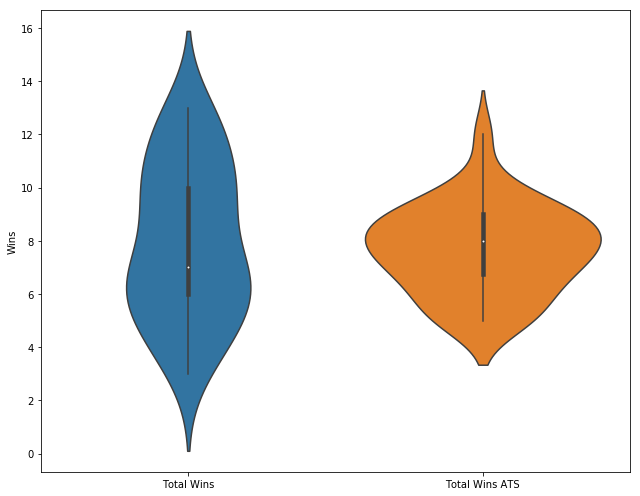

In [23]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 

sns.violinplot(ax = ax, data = df)
ax.set_ylabel('Wins')
plt.tight_layout()
plt.savefig('wins_vs_winsATS_violinchart.png')

plt.show()


In [24]:
path3 = 'CLEAN4thquapoisur.csv'
df3 = pd.read_csv(path3)

In [25]:
new_chart1.head()

,Team,Total Wins ATS,Rank
5,Chicago Bears,12,1
2,Baltimore Ravens,8,2
30,Tennessee Titans,8,3
14,Jacksonville Jaguars,5,4
12,Houston Texans,7,5


In [26]:
fourth_half_s = pd.merge(df3, new_chart1, on='Team', how = 'left')

In [27]:
fourth_half_s = fourth_half_s[['Team','2018','Total Wins ATS']]

In [28]:
fourth_half_s = fourth_half_s.rename(columns = {'2018':'4th Q Pts Sur.'})
fourth_half_s.head()

,Team,4th Q Pts Sur.,Total Wins ATS
0,Tennessee Titans,3.9,8
1,Baltimore Ravens,4.1,8
2,Denver Broncos,4.1,6
3,Houston Texans,4.2,7
4,New Orleans Saints,4.9,10


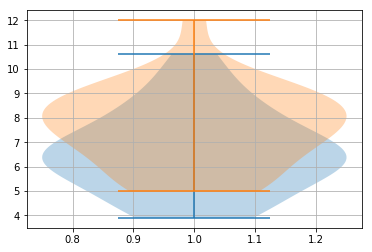

In [29]:
plt.violinplot(fourth_half_s["4th Q Pts Sur."])
plt.violinplot(fourth_half_s["Total Wins ATS"])




# fig, ax = pyplot.subplots(figsize =(9, 7)) 

# sns.violinplot(ax = ax, data = fourth_half_s)
# ax.set_ylabel('Wins')
# plt.tight_layout()
# #plt.savefig('wins_vs_winsATS_violinchart.png')

plt.grid()
plt.show()




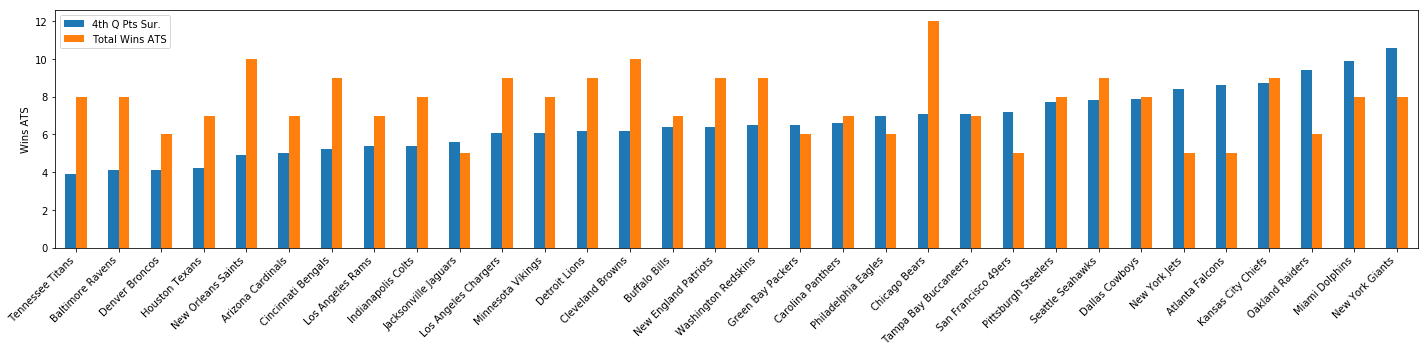

In [30]:
multi_plot = fourth_half_s.plot(kind="bar", figsize=(20,5))

multi_plot.set_xticklabels(fourth_half_s["Team"], rotation=45, ha = "right")



plt.ylabel('Wins ATS')
plt.tight_layout()
#plt.savefig('wins_vs_winsATS_barchart.png')

plt.show()

In [31]:
fourth_half_s.head()

,Team,4th Q Pts Sur.,Total Wins ATS
0,Tennessee Titans,3.9,8
1,Baltimore Ravens,4.1,8
2,Denver Broncos,4.1,6
3,Houston Texans,4.2,7
4,New Orleans Saints,4.9,10


In [32]:
ratio4th = fourth_half_s['Total Wins ATS'] / fourth_half_s['4th Q Pts Sur.']

In [33]:
fourth_half_s['Ratio'] = ratio4th

In [34]:
fourth_half_s

,Team,4th Q Pts Sur.,Total Wins ATS,Ratio
0,Tennessee Titans,3.9,8,2.051282
1,Baltimore Ravens,4.1,8,1.951220
2,Denver Broncos,4.1,6,1.463415
3,Houston Texans,4.2,7,1.666667
4,New Orleans Saints,4.9,10,2.040816
5,Arizona Cardinals,5.0,7,1.400000
6,Cincinnati Bengals,5.2,9,1.730769
7,Los Angeles Rams,5.4,7,1.296296
8,Indianapolis Colts,5.4,8,1.481481
9,Jacksonville Jaguars,5.6,5,0.892857


In [36]:
path4 = '2018_Results_New.csv'
df4 = pd.read_csv(path4)